### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

In [10]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns

In [11]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [13]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

In [14]:
gd_volume = df[['region', 'Total Volume']].groupby('region').sum().reset_index()

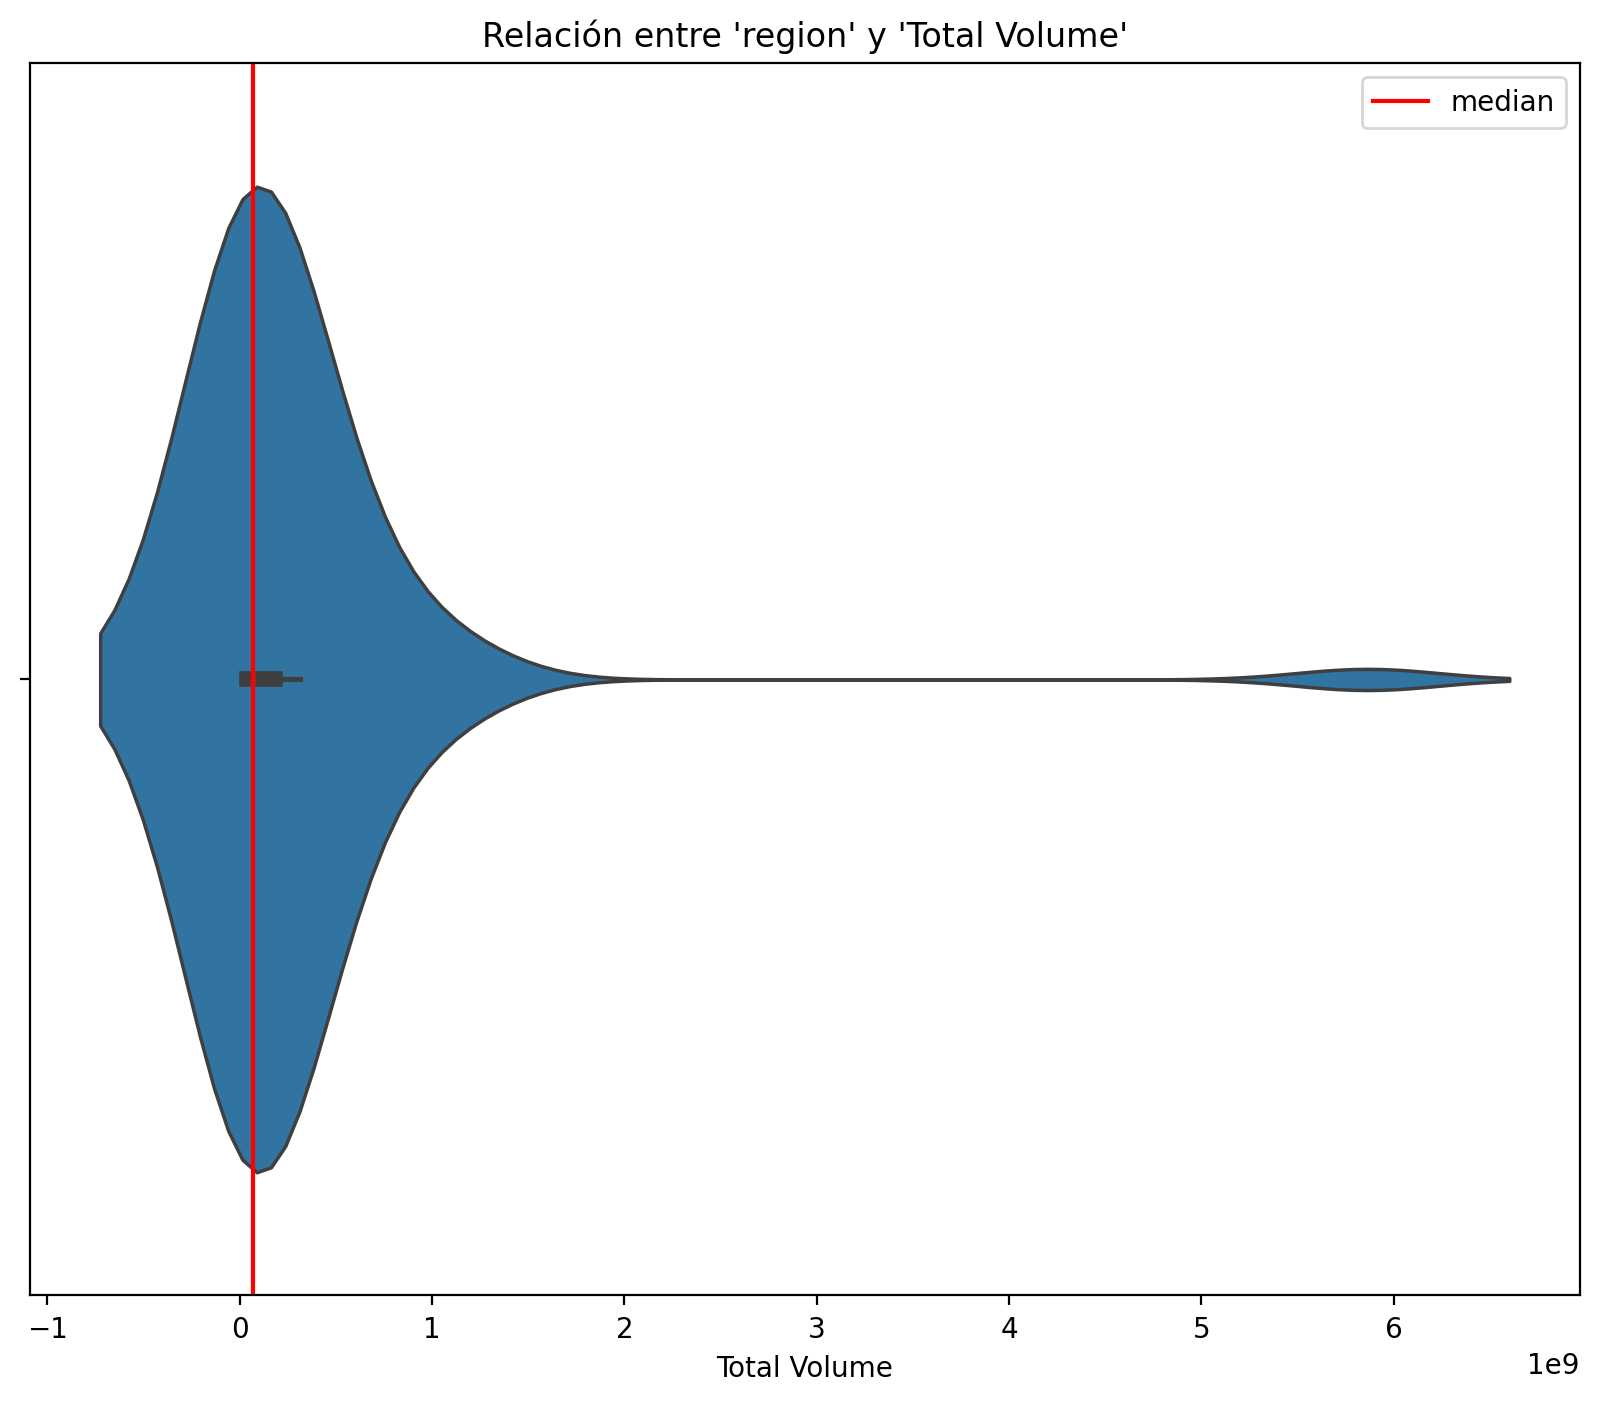

In [15]:
# Create a violin plot for the 'Total Volume' column
plt.figure(figsize=(10, 8))
violin = sns.violinplot(x=gd_volume['Total Volume'])
#violin = sns.violinplot(x=grouped_data['Total Volume'], y=grouped_data.region)
plt.title('Relación entre \'region\' y \'Total Volume\'')
plt.xlabel('Total Volume')

# Add a vertical line at the median volume
violin.axvline(x=gd_volume['Total Volume'].median(), c="red", label="median")

# Add a legend to the plot to label the red line as 'median'
plt.legend()

In [16]:
# OBSERVATION: The DataFrame contains heterogeneous data (e.g. statistics about cities, regions, greater regions and TotalUS)
# Filter out rows that are not proper US Greater Regions
greater_regions = df[df['cat_region']=='GreaterRegion']

In [17]:
gd_volume_regional = greater_regions[['region', 'Total Volume']].groupby('region').sum().reset_index()
gd_volume_regional

,region,Total Volume
0,California,1.028982e+09
1,GreatLakes,5.896425e+08
2,Midsouth,5.083494e+08
3,Northeast,7.132809e+08
4,Plains,3.111885e+08
5,SouthCentral,1.011280e+09
6,Southeast,6.152384e+08
7,West,1.086779e+09


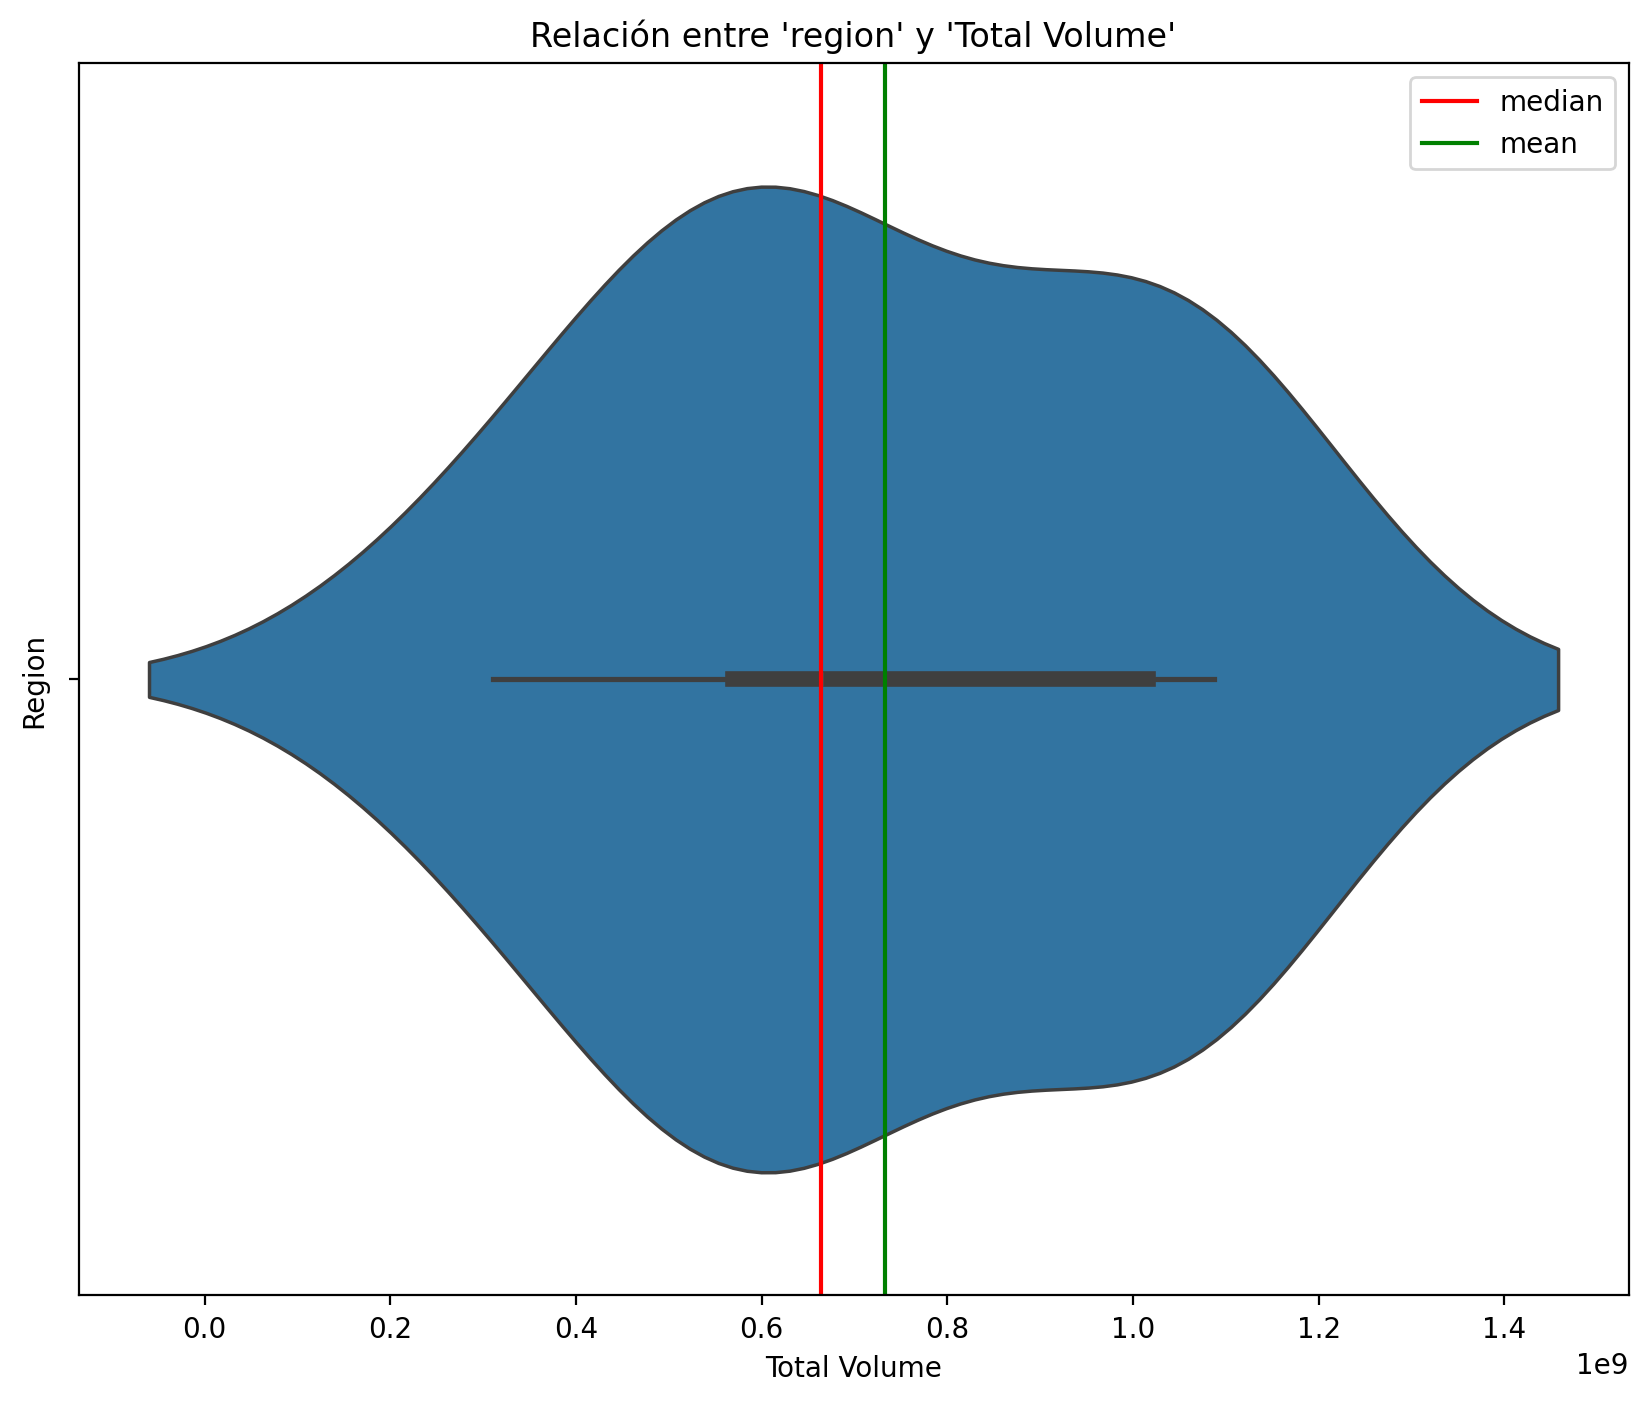

In [27]:
# Create a violin plot for the 'Total Volume' column
plt.figure(figsize=(10, 8))
violin = sns.violinplot(x=gd_volume_regional['Total Volume'])
#violin = sns.violinplot(x=gd_volume_regional['Total Volume'], y=gd_volume_regional.region)
plt.title('Relación entre \'region\' y \'Total Volume\'')
plt.xlabel('Total Volume')
plt.ylabel('Region')

# Add a vertical line at the median volume
violin.axvline(x=gd_volume_regional['Total Volume'].median(), c="red", label="median")
violin.axvline(x=gd_volume_regional['Total Volume'].mean(), c="green", label="mean")

# Add a legend to the plot to label the red line as 'median'
plt.legend()

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

In [56]:
prices_yearly = greater_regions[['AveragePrice','year','region']]
prices_yearly

,AveragePrice,year,region
312,0.90,2015,California
313,0.94,2015,California
314,0.87,2015,California
315,0.78,2015,California
316,0.91,2015,California
...,...,...,...
18232,1.41,2018,West
18233,1.80,2018,West
18234,1.83,2018,West
18235,1.82,2018,West


In [110]:
prices_yearly['year'].unique()

array([2015, 2016, 2017, 2018])

In [89]:
yr2015 = prices_yearly[prices_yearly['year']==2015][['region','AveragePrice']]
yr2016 = prices_yearly[prices_yearly['year']==2016][['region','AveragePrice']]
yr2017 = prices_yearly[prices_yearly['year']==2017][['region','AveragePrice']]
yr2018 = prices_yearly[prices_yearly['year']==2018][['region','AveragePrice']]
yr2015

,region,AveragePrice
312,California,0.90
313,California,0.94
314,California,0.87
315,California,0.78
316,California,0.91
...,...,...
11877,West,1.34
11878,West,1.52
11879,West,1.33
11880,West,1.39


Text(0.5, 0.98, 'Comparativa de precios entre años')

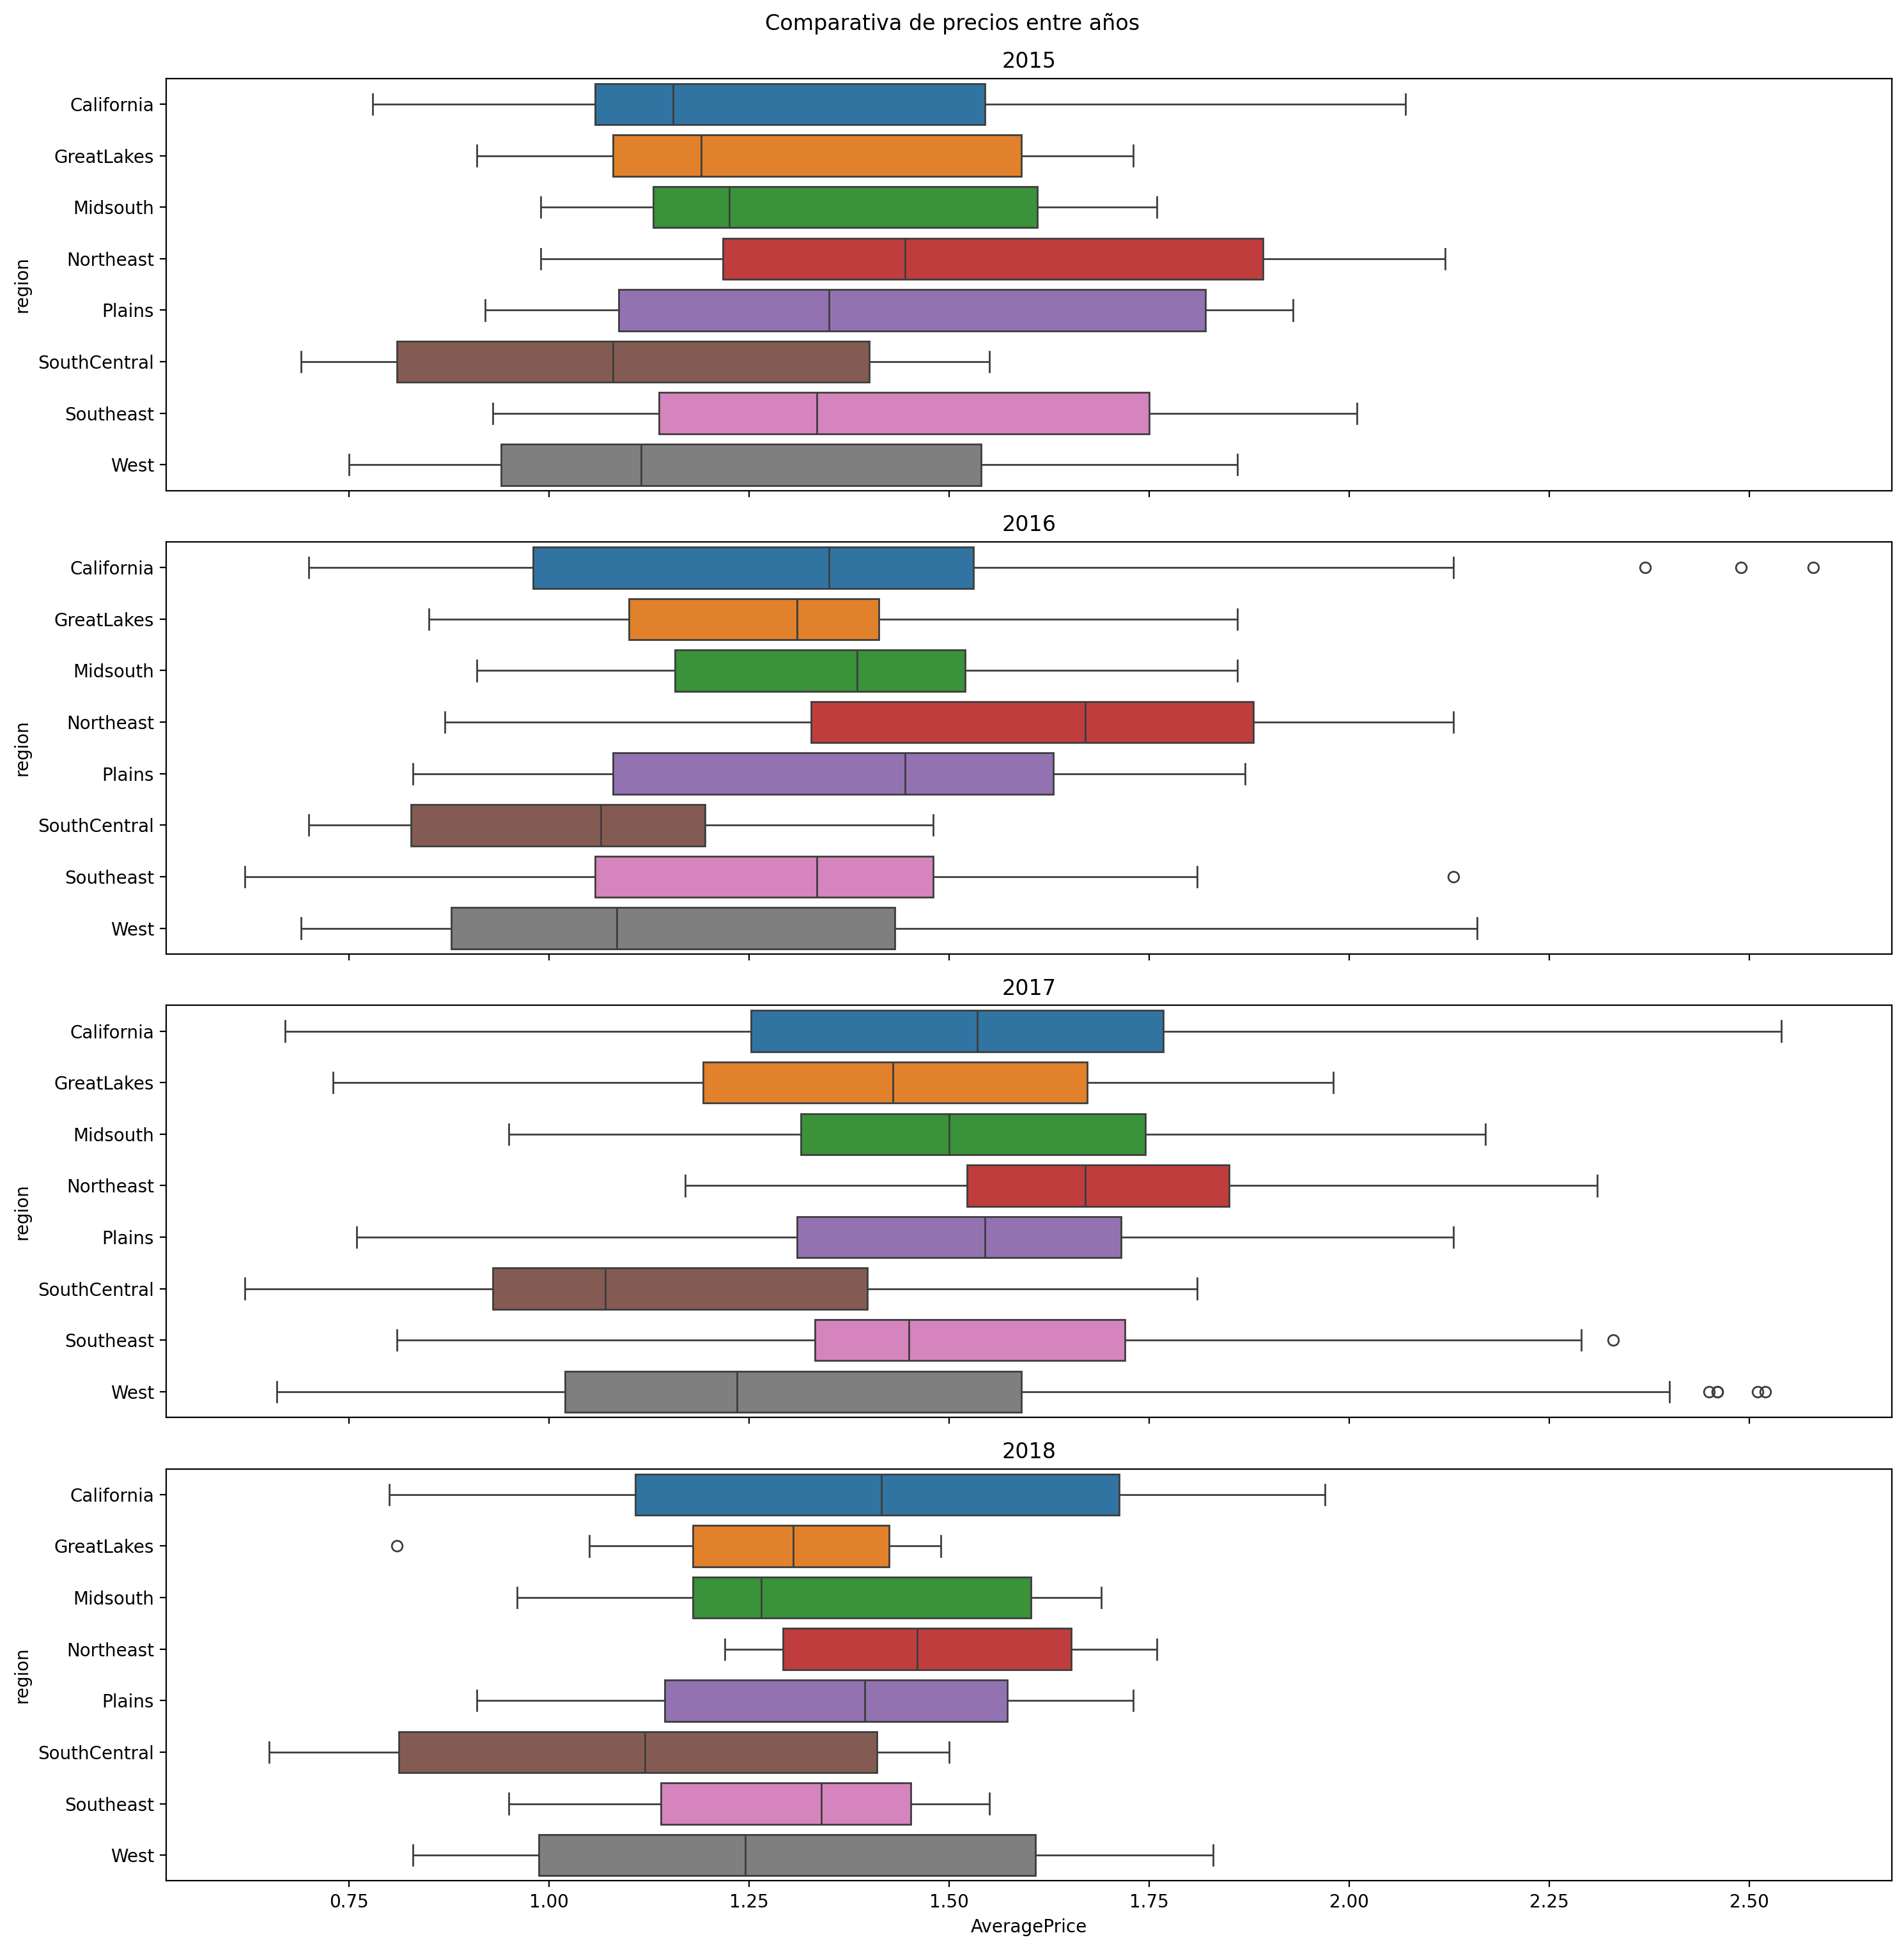

In [123]:
#plt.figure(figsize=(15,8))
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 15), sharex=True)
fig, axs = plt.subplots(4, 1, figsize=(15, 16), sharex=True)
sns.boxplot(x='AveragePrice', y='region', hue='region', data = yr2015, ax=axs[0])
axs[0].set_title('2015')
sns.boxplot(x='AveragePrice', y='region', hue='region', data = yr2016, ax=axs[1])
axs[1].set_title('2016')
sns.boxplot(x='AveragePrice', y='region', hue='region', data = yr2017, ax=axs[2])
axs[2].set_title('2017')
sns.boxplot(x='AveragePrice', y='region', hue='region', data = yr2018, ax=axs[3])
axs[3].set_title('2018')
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top
fig.suptitle('Comparativa de precios entre años')


**OBSERVACIONES:** Se detecta 1 outlier en el rango inferior para la región de GreatLakes en el año 2018. Habría que buscar información de algún suceso ocurrido en ese año que hiciera que el precio en esa región cayera prácticamente a la mitad de lo que es habitual en esa región.

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

Text(0.5, 0, 'Total Volume')

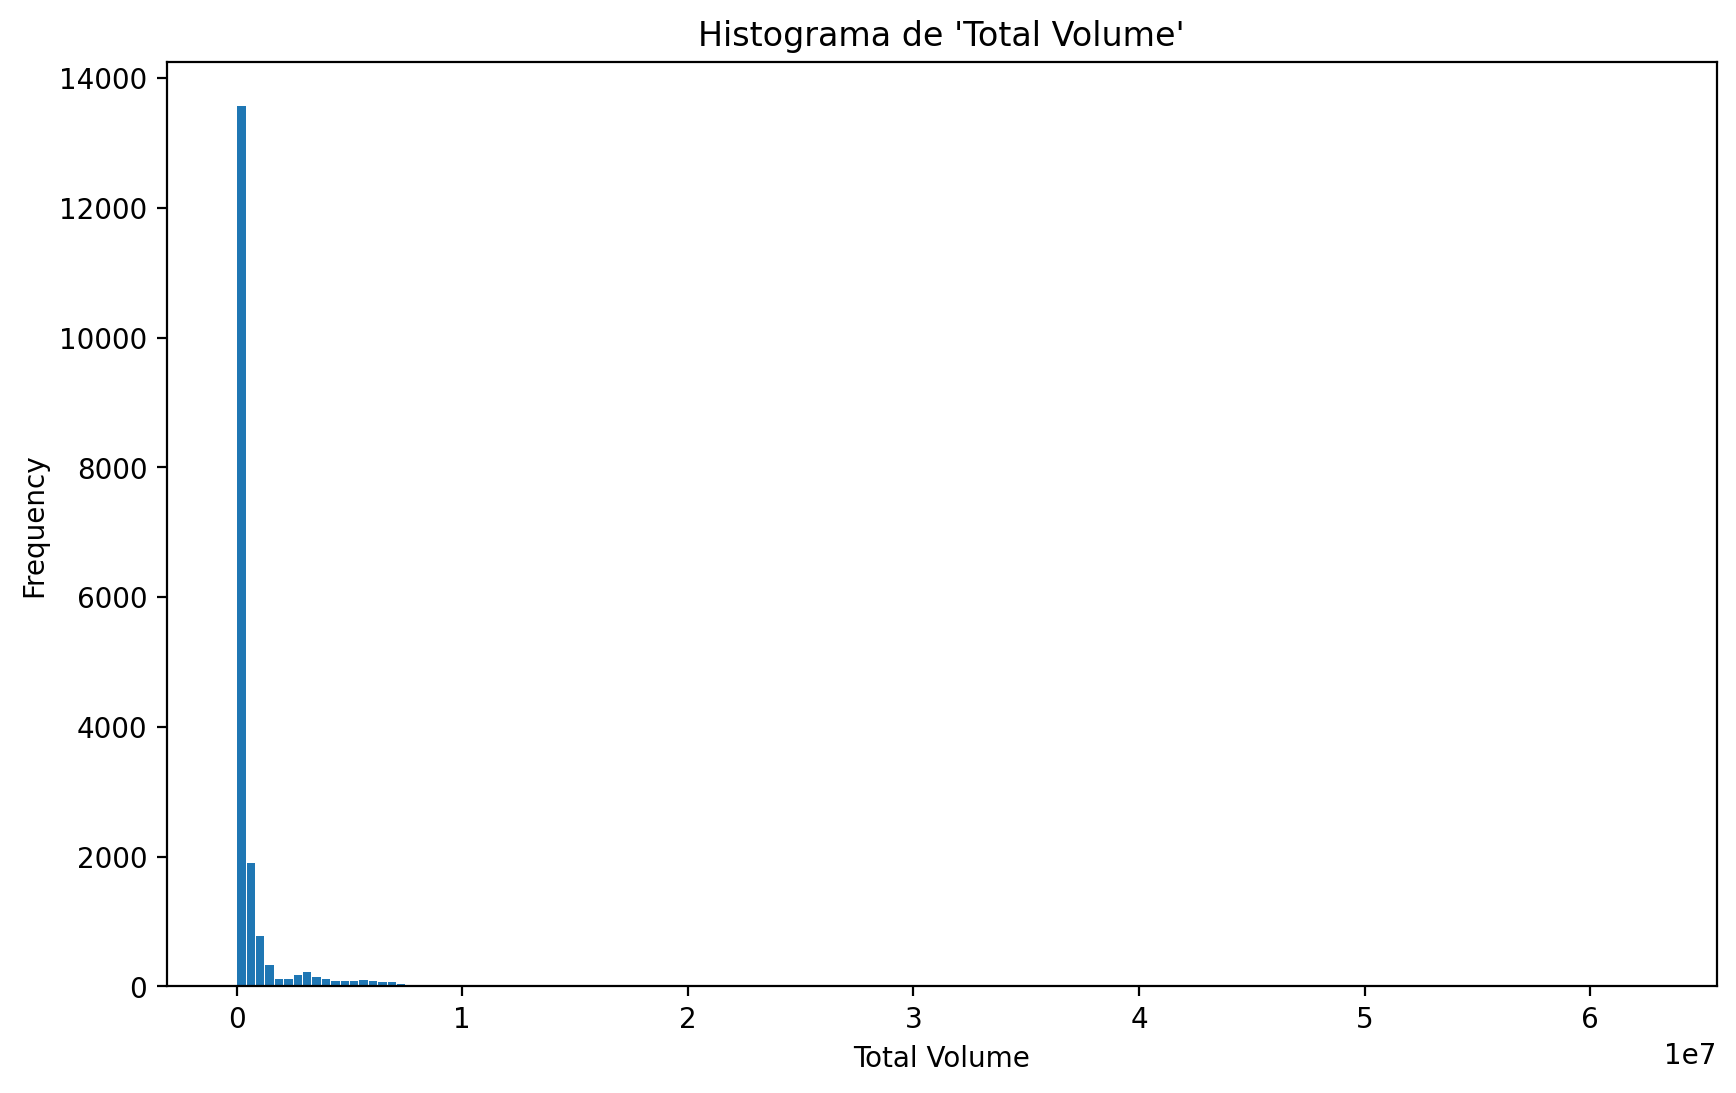

In [136]:
plt.figure(figsize=(10,6))
df['Total Volume'].plot.hist(bins=150, rwidth=0.90)
plt.title('Histograma de \'Total Volume\'')
plt.xlabel('Total Volume')

Text(0.5, 0, 'Total Volume')

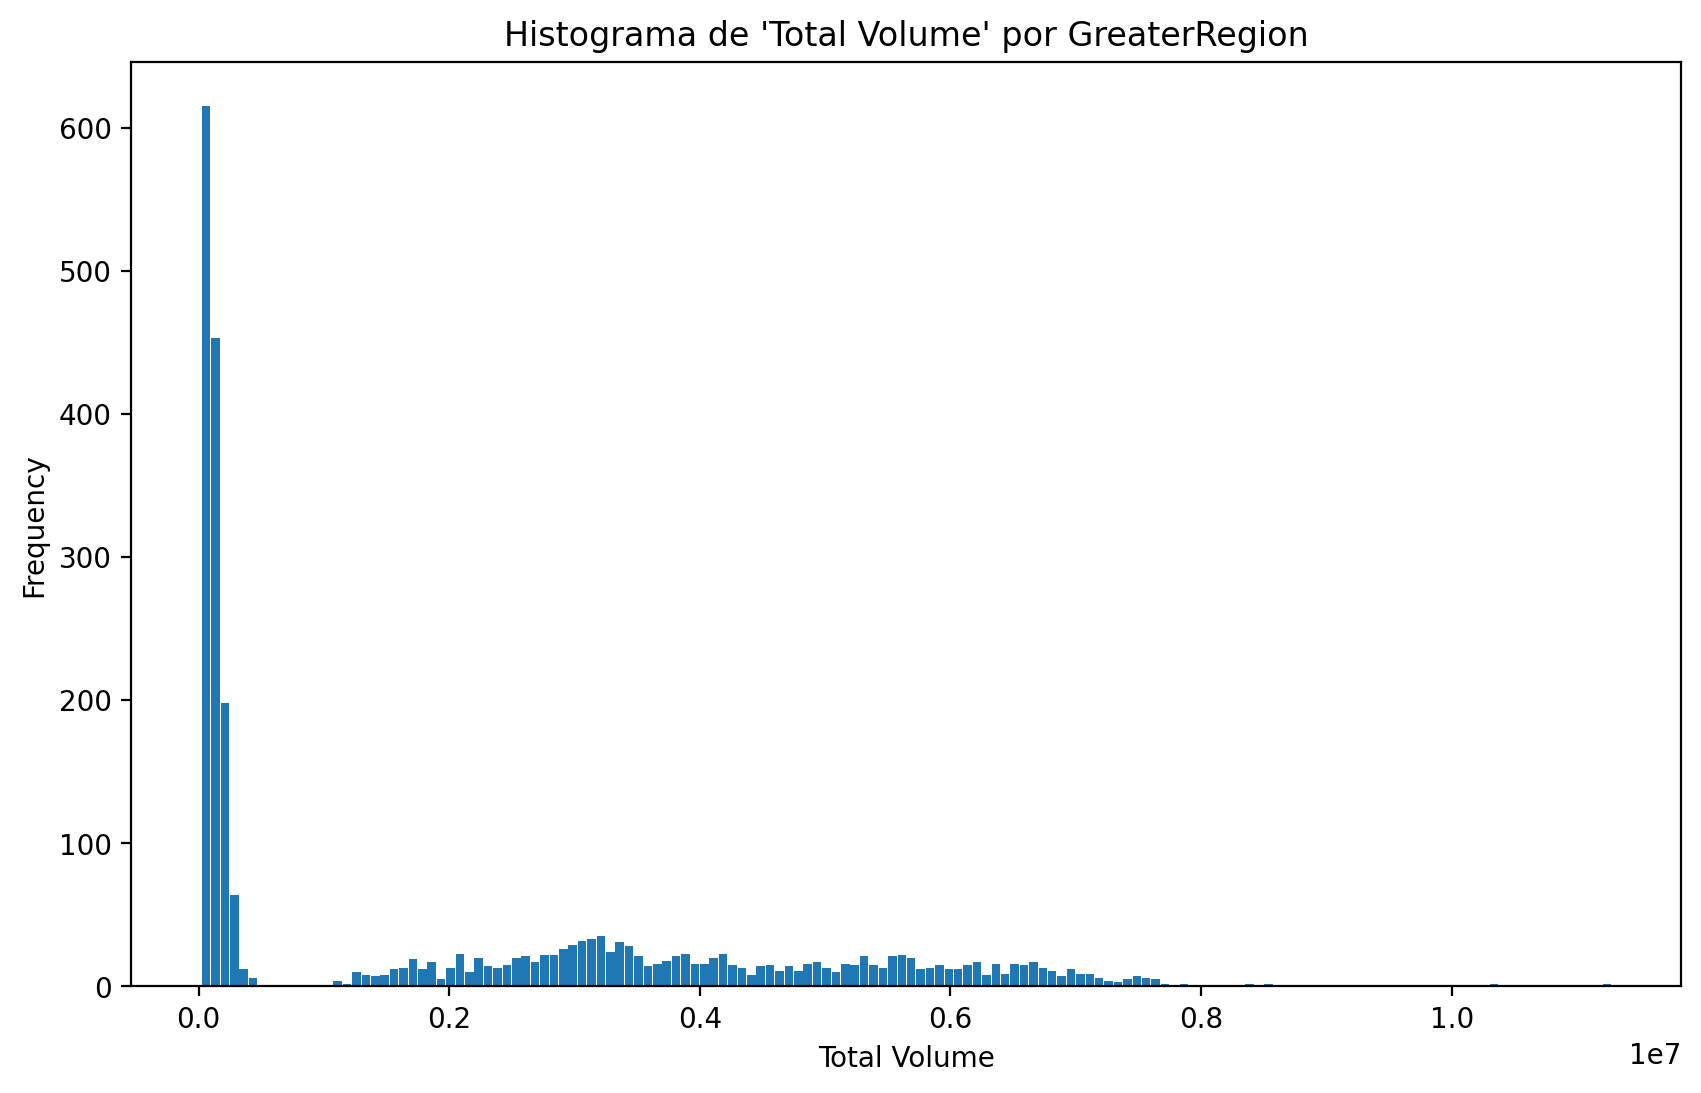

In [138]:
plt.figure(figsize=(10,6))
greater_regions['Total Volume'].plot.hist(bins=150, rwidth=0.90)
plt.title('Histograma de \'Total Volume\' por GreaterRegion')
plt.xlabel('Total Volume')

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

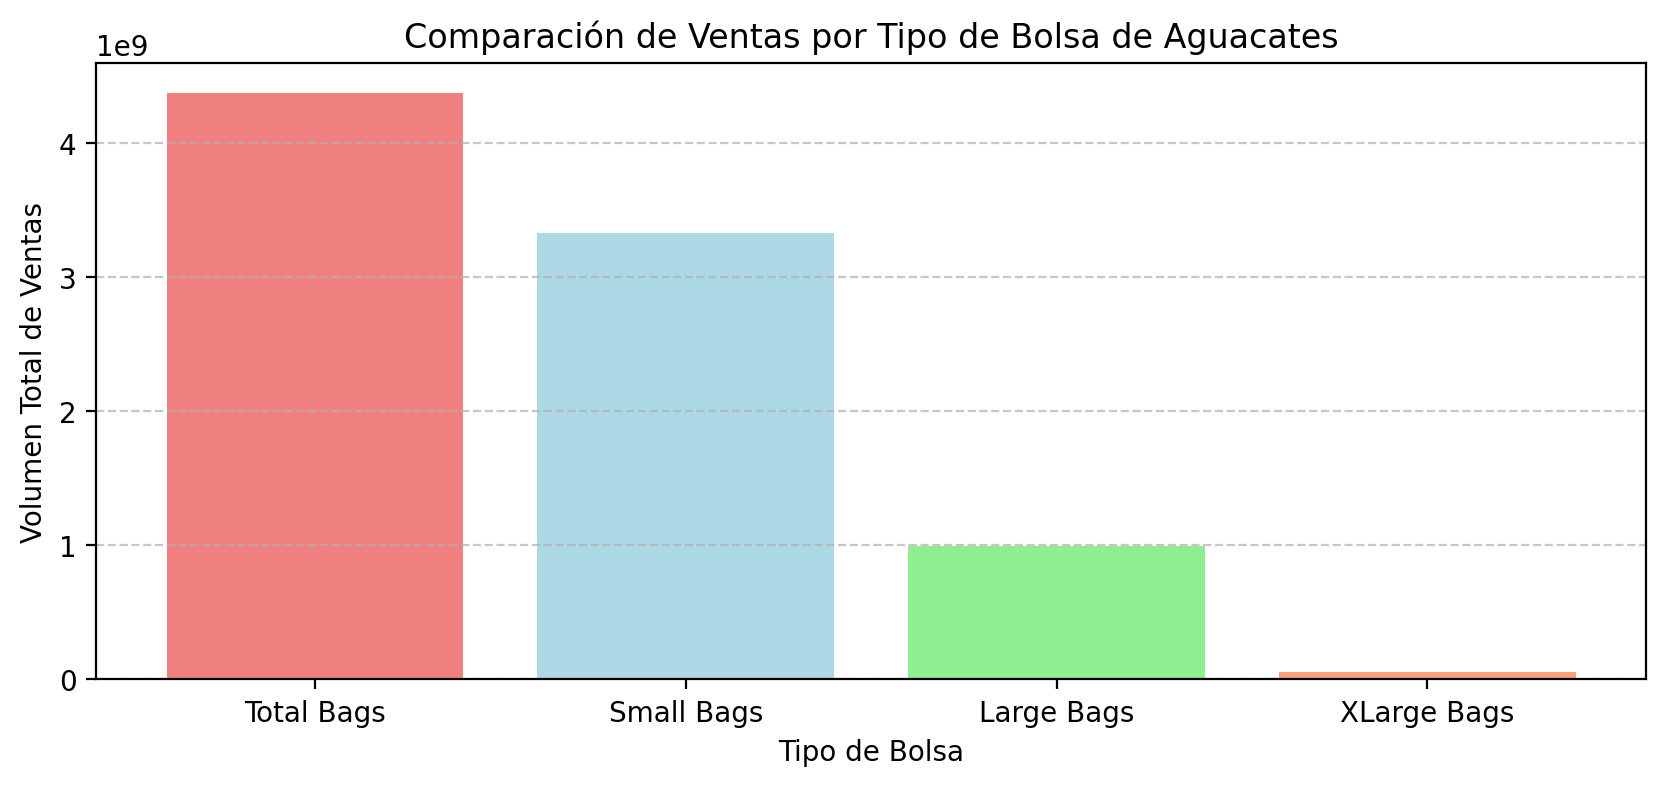

In [139]:
# Sumo las ventas de cada tipo de bolsa
total_bags = df['Total Bags'].sum()
small_bags = df['Small Bags'].sum()
large_bags = df['Large Bags'].sum()
xlarge_bags = df['XLarge Bags'].sum()

# Creo una lista con los valores y etiquetas
bags_types = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
bags_sales = [total_bags, small_bags, large_bags, xlarge_bags]

# Configuro el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Creo el gráfico de barras
plt.bar(bags_types, bags_sales, color=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])

# Configuro el gráfico
plt.title('Comparación de Ventas por Tipo de Bolsa de Aguacates')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen Total de Ventas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.